# Creating word vectors with word2vec

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Load dependencies

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline


In [3]:
nltk.download('punkt') # will tokenize the raw text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rsavita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load Data

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\rsavita\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
len(gutenberg.fileids())

18

#### Tokenize Text

In [8]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [9]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [10]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [11]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [13]:
gberg_sents = gutenberg.sents()

In [14]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [15]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
gberg_sents[4][14]

'father'

In [17]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [18]:
len(gutenberg.words())

2621613

#### Run word2vec

In [19]:
model = Word2Vec(sentences = gberg_sents,size = 64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [20]:
model.save('raw_gutenber_model.w2v')

#### explore model

In [21]:
model = gensim.models.Word2Vec.load('raw_gutenber_model.w2v')

In [22]:
model['dog']

array([ 0.24541768, -0.25506526, -0.20578414, -0.3386971 ,  0.03023116,
       -0.0280863 , -0.1702425 , -0.11984763, -0.15629032, -0.37616438,
       -0.07406075,  0.06565645, -0.45717224, -0.07175264,  0.01578059,
        0.22172649, -0.46108475,  0.10014453,  0.10254443, -0.6467314 ,
       -0.1235074 , -0.34787422, -0.56592476, -0.15400305,  0.21558122,
       -0.12359368, -0.0600494 ,  0.01289091, -0.15266205, -0.04771585,
        0.15499909, -0.259152  , -0.23104127, -0.03093837,  0.4790315 ,
        0.04697558, -0.10030514, -0.08730858,  0.5773613 , -0.17470972,
       -0.26619625, -0.33942464, -0.10029253, -0.1119209 , -0.579518  ,
        0.29628244,  0.31005812,  0.5969585 , -0.4024773 , -0.26800632,
        0.2807846 , -0.01351073, -0.2795798 , -0.08186495,  0.3102751 ,
       -0.22607112,  0.31401303,  0.10402166, -0.19652   , -0.6653099 ,
        0.07236225, -0.11528451,  0.34189725,  0.5408546 ], dtype=float32)

In [23]:
len(model['dog'])

64

In [24]:
model.most_similar('dog')

[('puppy', 0.831484317779541),
 ('cage', 0.787165105342865),
 ('thief', 0.7749069929122925),
 ('sweeper', 0.7638200521469116),
 ('broth', 0.7591091990470886),
 ('lazy', 0.7535085678100586),
 ('pet', 0.7532860636711121),
 ('shell', 0.7502807974815369),
 ('pig', 0.7481951713562012),
 ('wid', 0.738344669342041)]

In [25]:
model.most_similar('think')

[('suppose', 0.8591122627258301),
 ('downright', 0.8345851898193359),
 ('manage', 0.832348108291626),
 ('contradict', 0.8276323676109314),
 ('know', 0.8173092007637024),
 ('NOW', 0.8110828399658203),
 ('pretend', 0.8062014579772949),
 ('_you_', 0.8026436567306519),
 ('Mamma', 0.8025802373886108),
 ('really', 0.7975112795829773)]

In [26]:
model.most_similar('day')

[('morning', 0.8058764934539795),
 ('time', 0.7657111883163452),
 ('night', 0.7434841394424438),
 ('evening', 0.721628725528717),
 ('month', 0.7002397775650024),
 ('feasting', 0.6685997247695923),
 ('fortnight', 0.6608756184577942),
 ('sabbath', 0.6595529913902283),
 ('morrow', 0.6594308018684387),
 ('week', 0.6588656306266785)]

In [27]:
model.most_similar('father')

[('mother', 0.8684975504875183),
 ('brother', 0.8319509029388428),
 ('sister', 0.797193169593811),
 ('wife', 0.7766557931900024),
 ('Amnon', 0.7744367718696594),
 ('daughter', 0.7559776306152344),
 ('uncle', 0.7366139888763428),
 ('Tamar', 0.7293225526809692),
 ('bondwoman', 0.7270071506500244),
 ('aunt', 0.7201921939849854)]

In [28]:
model.doesnt_match('mother father daughter dog'.split())

'dog'

In [29]:
model.similarity('father', 'dog')

0.4569878

In [30]:
model.most_similar(positive=['father','woman'], negative=['man'])

[('mother', 0.7794911861419678),
 ('sister', 0.7701559066772461),
 ('wife', 0.7470191717147827),
 ('husband', 0.744673490524292),
 ('daughter', 0.737558901309967),
 ('Sarah', 0.7115575671195984),
 ('Sarai', 0.7040257453918457),
 ('brother', 0.696996808052063),
 ('conceived', 0.6866369247436523),
 ('Tamar', 0.6747235059738159)]

In [31]:
model.most_similar(positive=['son','woman'], negative=['man'])

[('Sarah', 0.728779673576355),
 ('Bethuel', 0.7196596264839172),
 ('wife', 0.716499924659729),
 ('Sarai', 0.7133994698524475),
 ('conceived', 0.7117021083831787),
 ('daughter', 0.7097631096839905),
 ('Leah', 0.7087554335594177),
 ('Hagar', 0.7056940197944641),
 ('Hittite', 0.699674129486084),
 ('Bilhah', 0.6965653896331787)]

In [32]:
model.most_similar(positive=['husband','woman'], negative=['man'])

[('wife', 0.7389430999755859),
 ('sister', 0.7205263376235962),
 ('mother', 0.6947933435440063),
 ('conceived', 0.6942265033721924),
 ('daughter', 0.6753430962562561),
 ('child', 0.6677201986312866),
 ('widow', 0.6247478127479553),
 ('maid', 0.6220535039901733),
 ('daughters', 0.6208688020706177),
 ('Amnon', 0.6154463291168213)]

In [33]:
model.most_similar(positive=['king','woman'], negative=['man'], topn=30)

[('Sarah', 0.7387433052062988),
 ('Rachel', 0.700043261051178),
 ('Solomon', 0.6840617656707764),
 ('Judah', 0.679451048374176),
 ('Sarai', 0.6748634576797485),
 ('Bethuel', 0.669191837310791),
 ('Laban', 0.6648433208465576),
 ('Pharaoh', 0.6627242565155029),
 ('Leah', 0.6625240445137024),
 ('Hagar', 0.6621479392051697),
 ('Abram', 0.6583287715911865),
 ('birthright', 0.6565449237823486),
 ('Padanaram', 0.6488521099090576),
 ('queen', 0.6479496359825134),
 ('Rebekah', 0.6467177867889404),
 ('princes', 0.6459287405014038),
 ('Jerusalem', 0.6421458721160889),
 ('Bilhah', 0.6406620740890503),
 ('Esau', 0.6400216221809387),
 ('David', 0.6366969347000122),
 ('Ephron', 0.6363056898117065),
 ('daughter', 0.6289157867431641),
 ('Mephibosheth', 0.6287192106246948),
 ('damsel', 0.6256215572357178),
 ('Zilpah', 0.6248639225959778),
 ('Hittite', 0.6233786940574646),
 ('Heth', 0.6209570169448853),
 ('tribute', 0.6194709539413452),
 ('Uriah', 0.6192054152488708),
 ('kindred', 0.618607759475708)]

#### reduce word vector dimensionality with t-sne

In [34]:
len(model.wv.vocab)

17011

In [35]:
x=model[model.wv.vocab]

In [36]:
tsne = TSNE(n_components=2,n_iter=1000)

In [37]:
X_2d = tsne.fit_transform(x)

In [38]:
coords_df = pd.DataFrame(X_2d, columns=('x','y'))
coords_df['token'] = model.wv.vocab.keys()

In [39]:
coords_df.head() ## coordinates down from 64 to 2

,x,y,token
0,1.968345,-4.843569,[
1,3.945400,-2.454006,Emma
2,-3.431122,0.284475,by
3,3.809055,-2.792186,Jane
4,1.962421,-4.853869,]


#### Visualize the 2 d representations of word vectors

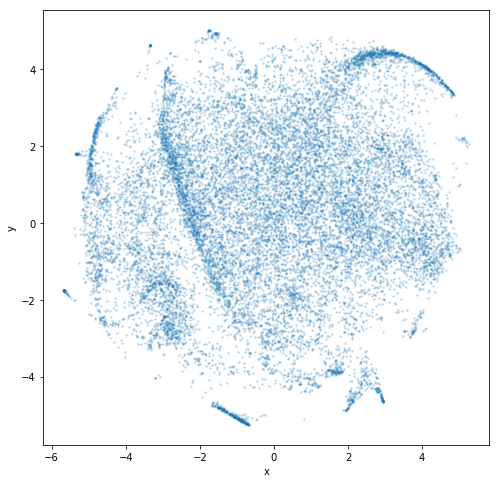

In [40]:
_ = coords_df.plot.scatter('x','y', figsize = (8,8), marker='.',s=10, alpha=0.2)

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
subset_df = coords_df.sample(n=5000)

In [43]:
p = figure(plot_width=600, plot_height = 600)
_ = p.text(x = subset_df.x, y=subset_df.y, text = subset_df.token)

In [44]:
show(p)